# Project 3: Model Assessment and Validation

Re-implement the example in section 7.10.2 using any simple, out of the box classifier (like K nearest neighbors from sci-kit). Reproduce the results for the incorrect and correct way of doing cross-validation.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [3]:
N = 50      # (obs in each class)
p = 5000    # (predictors per obs)
k = 100     # want top 100 predictors correlated w label
n_sims = 50 # number of simulations

In [4]:
CV_errors = []

for sim in range(n_sims):
    # make random data
    X = np.random.normal(0, 1, (N, p))
    y = np.concatenate([np.zeros(N // 2), np.ones(N // 2)]) 

    # Step 1
    corrs = np.array([pearsonr(X[:, i], y)[0] for i in range(p)])
    top_corrs_idx = np.argsort(np.abs(corrs))[-k:]
    top_preds = X[:,top_corrs_idx]

    # Step 2 
    knn = KNeighborsClassifier(n_neighbors=1)

    # Step 3
    cv_scores = cross_val_score(knn, top_preds, y, cv=5, scoring='accuracy')
    CV_errors.append(1 - np.mean(cv_scores))

print(f'Average CV error rate: {np.round(np.mean(CV_errors)*100,2)}%')

Average CV error rate: 1.28%


(-0.5, 0.5)

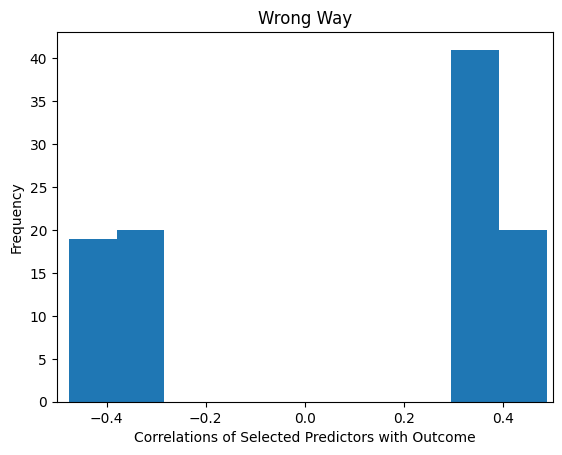

In [17]:
plt.hist(corrs[top_corrs_idx])
plt.title('Wrong Way')
plt.ylabel('Frequency')
plt.xlabel('Correlations of Selected Predictors with Outcome')
plt.xlim(-0.5,0.5)

In [9]:
CV_errors_t = []
X = np.random.normal(0, 1, (N, p))
y = np.concatenate([np.zeros(N // 2), np.ones(N // 2)]) 

kf = KFold(n_splits=10, random_state=42, shuffle=True)

for train_index, test_index in kf.split(X):
    # 1. get splits
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # 2. get corrs & top 100 index
    corrs_t = np.array([pearsonr(X_train[:, i], y_train)[0] for i in range(p)])
    top_corrs_idx_t = np.argsort(np.abs(corrs_t))[-k:]

    # 3. select top preds for train and test set
    top_preds_train = X_train[:,top_corrs_idx_t]
    top_preds_test = X_test[:,top_corrs_idx_t]

    # 4. get nearest neighbor classifier, train on train set
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(top_preds_train, y_train)

    # 5. predict on test set and get CV errors
    y_pred = knn.predict(top_preds_test)
    error_rate = np.mean(y_pred != y_test)
    CV_errors_t.append(error_rate)

In [11]:
print(f'Average CV error rate: {np.round(np.mean(CV_errors_t)*100,2)}%')

Average CV error rate: 78.0%


(-0.5, 0.5)

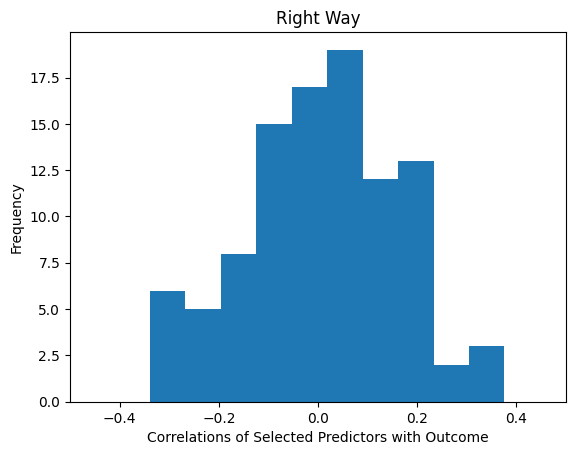

In [18]:
plt.hist(corrs_t[top_corrs_idx])
plt.title('Right Way')
plt.ylabel('Frequency')
plt.xlabel('Correlations of Selected Predictors with Outcome')
plt.xlim(-0.5,0.5)